# Project: Wrangle and Analyze Data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering</a></li>
<li><a href="#assesing">Assessing</a></li>
<li><a href="#cleaning">Cleaning</a></li>
</ul>


<a id='intro'></a>
## Introduction

>**This project has 3 files a collection of three different sources. Aims to apply the process of data wrangling.**


<a id='gathering'></a>
## Gathering

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import json
import os
import requests
%matplotlib inline


### 1- API tweepy.

In [ ]:
# Code API tweepy 
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [ ]:
df_list = []
error_list = []



# Will add each available tweet json to df_list
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit = True,
                               wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # Tweet's favorites
        retweets = tweet['retweet_count'] 
        user_followers = tweet['user']['followers_count'] 
        user_favourites = tweet['user']['favourites_count'] # User's favorites
        date_time = tweet['created_at'] # The date and time of the creation
        
        df_list.append({'tweet_id': int(tweet_id), 'favorites': int(favorites), 'retweets': int(retweets),
                        'user_followers': int(user_followers), 'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
        
    except Exception as e:
        print(str(tweet_id)+ " __ " + str(e))
        error_list.append(tweet_id)
        

In [ ]:
# Create DataFrames 'json' and save it in a file
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets', 'user_followers',
                                               'user_favourites', 'date_time'])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

### 2-  The file "json".

In [3]:
# Read file 'json' and print
import json

with open ("tweet-json.json") as f:
    contnt = [json.loads(line) for line in f]
    
print(contnt[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [4]:
tweet_json = dict()
tweet_json['tweet_id'] = list()
tweet_json['friends_count'] = list() 
tweet_json['listed_count'] = list()
tweet_json['favourites_count'] = list()
tweet_json['statuses_count'] = list()
tweet_json['retweet_count'] = list()
tweet_json['favorite_count'] = list()


for i in range(len(contnt)):
    tweet_json['tweet_id'].append(contnt[i]['id'])
    tweet_json['friends_count'].append(contnt[i]['user']['friends_count'])
    tweet_json['listed_count'].append(contnt[i]['user']['listed_count'])
    tweet_json['favourites_count'].append(contnt[i]['user']['favourites_count'])
    tweet_json['statuses_count'].append(contnt[i]['user']['statuses_count'])
    tweet_json['retweet_count'].append(contnt[i]['retweet_count'])
    tweet_json['favorite_count'].append(contnt[i]['favorite_count'])

    
tweet_df = pd.DataFrame.from_dict(tweet_json)


In [5]:
tweet_df.head(30)

,tweet_id,friends_count,listed_count,favourites_count,statuses_count,retweet_count,favorite_count
0,892420643555336193,104,2784,114031,5288,8853,39467
1,892177421306343426,104,2784,114031,5288,6514,33819
2,891815181378084864,104,2784,114031,5288,4328,25461
3,891689557279858688,104,2784,114031,5288,8964,42908
4,891327558926688256,104,2784,114031,5288,9774,41048
5,891087950875897856,104,2784,114031,5288,3261,20562
6,890971913173991426,104,2784,114031,5288,2158,12041
7,890729181411237888,104,2784,114031,5288,16716,56848
8,890609185150312448,104,2784,114031,5288,4429,28226
9,890240255349198849,104,2784,114031,5288,7711,32467


In [6]:
# File information
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   tweet_id          2354 non-null   int64
 1   friends_count     2354 non-null   int64
 2   listed_count      2354 non-null   int64
 3   favourites_count  2354 non-null   int64
 4   statuses_count    2354 non-null   int64
 5   retweet_count     2354 non-null   int64
 6   favorite_count    2354 non-null   int64
dtypes: int64(7)
memory usage: 128.9 KB


#### No quality issues are detected in the tweet_df file

In [7]:
os.listdir()

['wrangle_act.ipynb',
 'twitter-archive-enhanced.csv',
 '.DS_Store',
 'act_report.pdf',
 'image_predictions.tsv',
 'wrangle_act.html',
 'tweet-json.json',
 '.ipynb_checkpoints',
 'master_data.csv',
 'image-predictions.tsv',
 'tweet_json.txt',
 'wrangle_report.pdf']

<a id='assesing'></a>
## Assessing

The assessing data we will assess the data visually and programmatically to identify:
 - Data quality issues.(9)
 - Tidiness issues.(2)

### 1- The file "twitter-archive-enhanced".

In [8]:
# Read file 'twitter-archive-enhanced'
twi_arc_enh= pd.read_csv("twitter-archive-enhanced.csv")
twi_arc_enh.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
len(twi_arc_enh)

2356

In [10]:
# Dimensions
twi_arc_enh.shape[0]

2356

In [11]:
# Getting the file information
twi_arc_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# General statistics
twi_arc_enh.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### 2- The file "image_predictions" and download.

In [13]:
# Reading the next file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
imp_pre= pd.read_csv("image-predictions.tsv", sep='\t')
imp_pre.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
# General statisitcs 
imp_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
# Getting the file information
imp_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
# Dimensions
imp_pre.shape[0]

2075

In [17]:
# Nunigue
imp_pre.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [18]:
imp_pre.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

# Quality Problems


1- Drop the columns 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', from twi_arc_enh table

2- Drop Null values from twt_arch_enh file. 

3- Transform colums p1_dog, p2_dog, p3_dog from bool type to int.

4- Dropp the zero in colums p3_dog.

5- In the imge columns jpg_url should be dropped.

6- Drop P1_conf >= 0.1.

7- imp_pre (p1) change to lowercase

8- imp_pre (p2) change to lowercase

9- imp_pre (p3) change to lowercase

# Tidiness Problems

1- Change timestamp in twi_arc_enh from object to datetime.

2- The three files should be merged together.


<a id='cleaning'></a>
## Cleaning

Define: Drop the columns 'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', from twi_arc_enh table

Code:

In [19]:
# Locating columns with values <200
drop_column = []

for column in twi_arc_enh.keys():
    if len(twi_arc_enh) - sum(twi_arc_enh[column].isnull())<200:
        drop_column.append(column)
        


Test:

In [20]:
drop_column

['in_reply_to_status_id',
 'in_reply_to_user_id',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp']

#### Define: Drop Null values from twt_arch_enh file.

Code:

In [21]:
# Dropping the located columns from above
twi_arc_enh.drop(drop_column, axis=1, inplace=True)


Test:

In [22]:
# Testing file information
twi_arc_enh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [26]:
# Checking number of unique values
twi_arc_enh.nunique()

tweet_id              2356
timestamp             2356
source                   4
text                  2356
expanded_urls         2218
rating_numerator        40
rating_denominator      18
name                   957
doggo                    2
floofer                  2
pupper                   2
puppo                    2
dtype: int64

In [27]:
# Testig the time column type
twi_arc_enh.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### Define: Transform colums p1_dog, p2_dog, p3_dog from bool type to int.

Code:

In [28]:
# Change is from bool to int
imp_pre["p1_dog"] = imp_pre["p1_dog"].astype(int)
imp_pre["p2_dog"] = imp_pre["p2_dog"].astype(int)
imp_pre["p3_dog"] = imp_pre["p3_dog"].astype(int)


Test:

In [29]:
# Tesing 
imp_pre.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,1,collie,0.156665,1,Shetland_sheepdog,0.061428,1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,1,miniature_pinscher,0.074192,1,Rhodesian_ridgeback,0.072010,1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,1,malinois,0.138584,1,bloodhound,0.116197,1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,1,redbone,0.360687,1,miniature_pinscher,0.222752,1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,1,Rottweiler,0.243682,1,Doberman,0.154629,1
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,1,English_springer,0.263788,1,Greater_Swiss_Mountain_dog,0.016199,1
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,0,mud_turtle,0.045885,0,terrapin,0.017885,0
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,1,Tibetan_mastiff,0.058279,1,fur_coat,0.054449,0
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,0,shopping_basket,0.014594,0,golden_retriever,0.007959,1
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,1,komondor,0.192305,1,soft-coated_wheaten_terrier,0.082086,1


#### Define: Dropp the zero in colums p3_dog.

Code:

In [30]:
# Testing p1_dog type
imp_pre["p1_dog"].value_counts()

1    1532
0     543
Name: p1_dog, dtype: int64

In [31]:
# Testing p2_dog type
imp_pre["p2_dog"].value_counts()

1    1553
0     522
Name: p2_dog, dtype: int64

In [32]:
# Testing p1_dog tyep
imp_pre["p3_dog"].value_counts()

1    1499
0     576
Name: p3_dog, dtype: int64

In [33]:
# Rmove p3_dog = 0
imp_pre = imp_pre[(imp_pre["p3_dog"] == 1)]

Test:

In [34]:
# Tesing p3_dog = 1
imp_pre["p3_dog"].value_counts()

1    1499
Name: p3_dog, dtype: int64

#### Define: In the imge columns jpg_url should be dropped.

Code:

In [35]:
# Rmoving jpg_url colume 
del imp_pre['jpg_url']

Test:

In [36]:
# Tesing 
imp_pre.head(20)

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,1,collie,0.156665,1,Shetland_sheepdog,0.061428,1
1,666029285002620928,1,redbone,0.506826,1,miniature_pinscher,0.074192,1,Rhodesian_ridgeback,0.072010,1
2,666033412701032449,1,German_shepherd,0.596461,1,malinois,0.138584,1,bloodhound,0.116197,1
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,1,redbone,0.360687,1,miniature_pinscher,0.222752,1
4,666049248165822465,1,miniature_pinscher,0.560311,1,Rottweiler,0.243682,1,Doberman,0.154629,1
5,666050758794694657,1,Bernese_mountain_dog,0.651137,1,English_springer,0.263788,1,Greater_Swiss_Mountain_dog,0.016199,1
8,666057090499244032,1,shopping_cart,0.962465,0,shopping_basket,0.014594,0,golden_retriever,0.007959,1
9,666058600524156928,1,miniature_poodle,0.201493,1,komondor,0.192305,1,soft-coated_wheaten_terrier,0.082086,1
10,666063827256086533,1,golden_retriever,0.775930,1,Tibetan_mastiff,0.093718,1,Labrador_retriever,0.072427,1
11,666071193221509120,1,Gordon_setter,0.503672,1,Yorkshire_terrier,0.174201,1,Pekinese,0.109454,1


#### Define: Drop P1_conf >= 0.1

Code:

In [37]:
# Rmove p1_conf < 0.1
imp_pre = imp_pre[(imp_pre["p1_conf"] >=0.1)]


Test:

In [38]:
# Testing
imp_pre['p1_conf'].min()

0.100499

Difine:

8- imp_pre (p1) change to lowercase

9- imp_pre (p2) change to lowercase

10- imp_pre (p3) change to lowercase

Code:

In [39]:
# Change p1, p2, p3 lower 
imp_pre['p1'] = imp_pre['p1'].str.lower()
imp_pre['p2'] = imp_pre['p2'].str.lower()
imp_pre['p3'] = imp_pre['p3'].str.lower()


Test:

In [40]:
# Testing
imp_pre.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,1,collie,0.156665,1,shetland_sheepdog,0.061428,1
1,666029285002620928,1,redbone,0.506826,1,miniature_pinscher,0.074192,1,rhodesian_ridgeback,0.072010,1
2,666033412701032449,1,german_shepherd,0.596461,1,malinois,0.138584,1,bloodhound,0.116197,1
3,666044226329800704,1,rhodesian_ridgeback,0.408143,1,redbone,0.360687,1,miniature_pinscher,0.222752,1
4,666049248165822465,1,miniature_pinscher,0.560311,1,rottweiler,0.243682,1,doberman,0.154629,1


#### Define: Change timestamp in twi_arc_enh from object to datetime

Code:

In [23]:
# Changing time type from object to pandas datetime 
twi_arc_enh['timestamp'] = pd.to_datetime(twi_arc_enh.timestamp)


Test:

In [24]:
# Tesing 
twi_arc_enh.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [25]:
# Testing the file after dropping
twi_arc_enh.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Difine: The three files should be merged together.

Code:

In [41]:
# Merging the three files as one file
master_data= pd.merge(tweet_df, imp_pre ,on='tweet_id')


Test:

In [42]:
# Testing
imp_pre.head()

,tweet_id,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,1,welsh_springer_spaniel,0.465074,1,collie,0.156665,1,shetland_sheepdog,0.061428,1
1,666029285002620928,1,redbone,0.506826,1,miniature_pinscher,0.074192,1,rhodesian_ridgeback,0.072010,1
2,666033412701032449,1,german_shepherd,0.596461,1,malinois,0.138584,1,bloodhound,0.116197,1
3,666044226329800704,1,rhodesian_ridgeback,0.408143,1,redbone,0.360687,1,miniature_pinscher,0.222752,1
4,666049248165822465,1,miniature_pinscher,0.560311,1,rottweiler,0.243682,1,doberman,0.154629,1


#### Difine: The three files should be merged together.

Code:

In [43]:
# Merging the three files as one file
master_data= pd.merge(master_data, twi_arc_enh ,on='tweet_id')


Test:

In [44]:
# Testing
master_data

,tweet_id,friends_count,listed_count,favourites_count,statuses_count,retweet_count,favorite_count,img_num,p1,p1_conf,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892177421306343426,104,2784,114031,5288,6514,33819,1,chihuahua,0.323581,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
1,891815181378084864,104,2784,114031,5288,4328,25461,1,chihuahua,0.716012,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
2,891327558926688256,104,2784,114031,5288,9774,41048,2,basset,0.555712,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
3,890729181411237888,104,2784,114031,5288,16716,56848,2,pomeranian,0.566142,...,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
4,890609185150312448,104,2784,114031,5288,4429,28226,1,irish_terrier,0.487574,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484,666049248165822465,104,2812,114031,5288,41,111,1,miniature_pinscher,0.560311,...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
1485,666044226329800704,104,2812,114031,5288,147,311,1,rhodesian_ridgeback,0.408143,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
1486,666033412701032449,104,2812,114031,5288,47,128,1,german_shepherd,0.596461,...,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
1487,666029285002620928,104,2812,114031,5288,48,132,1,redbone,0.506826,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [45]:
master_data.to_csv('master_data.csv', index=False)

# Analyzing the Data

In [46]:
# Read file 'master_data'
master_data = pd.read_csv('master_data.csv')
master_data.head(20)

,tweet_id,friends_count,listed_count,favourites_count,statuses_count,retweet_count,favorite_count,img_num,p1,p1_conf,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892177421306343426,104,2784,114031,5288,6514,33819,1,chihuahua,0.323581,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
1,891815181378084864,104,2784,114031,5288,4328,25461,1,chihuahua,0.716012,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
2,891327558926688256,104,2784,114031,5288,9774,41048,2,basset,0.555712,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
3,890729181411237888,104,2784,114031,5288,16716,56848,2,pomeranian,0.566142,...,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
4,890609185150312448,104,2784,114031,5288,4429,28226,1,irish_terrier,0.487574,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
5,890240255349198849,104,2784,114031,5288,7711,32467,1,pembroke,0.511319,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
6,890006608113172480,104,2784,114031,5288,7624,31166,1,samoyed,0.957979,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
7,889665388333682689,104,2784,114031,5288,8538,38818,1,pembroke,0.966327,...,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
8,889638837579907072,104,2784,114031,5288,4735,27672,1,french_bulldog,0.991650,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
9,889531135344209921,104,2784,114031,5288,2321,15359,1,golden_retriever,0.953442,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo


In [47]:
# File information
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1489 non-null   int64  
 1   friends_count       1489 non-null   int64  
 2   listed_count        1489 non-null   int64  
 3   favourites_count    1489 non-null   int64  
 4   statuses_count      1489 non-null   int64  
 5   retweet_count       1489 non-null   int64  
 6   favorite_count      1489 non-null   int64  
 7   img_num             1489 non-null   int64  
 8   p1                  1489 non-null   object 
 9   p1_conf             1489 non-null   float64
 10  p1_dog              1489 non-null   int64  
 11  p2                  1489 non-null   object 
 12  p2_conf             1489 non-null   float64
 13  p2_dog              1489 non-null   int64  
 14  p3                  1489 non-null   object 
 15  p3_conf             1489 non-null   float64
 16  p3_dog

## Question

1- What dog type recieved the highest retweet count?

2- What are the dog types and how many dogs are there for each?

3- What is the everage rating for the Golden Retreiver dog type?

## Q1

In [48]:
# ans on question 1
master_data[(master_data['retweet_count']==master_data['retweet_count'].max())].p1

646    labrador_retriever
Name: p1, dtype: object

In [49]:
# checking the row
master_data.iloc[646]

tweet_id                                             744234799360020481
friends_count                                                       104
listed_count                                                       2802
favourites_count                                                 114031
statuses_count                                                     5288
retweet_count                                                     79515
favorite_count                                                   131075
img_num                                                               1
p1                                                   labrador_retriever
p1_conf                                                        0.825333
p1_dog                                                                1
p2                                                             ice_bear
p2_conf                                                       0.0446808
p2_dog                                                          

Hence, the Labrador Retriever attained the highest retweet count!

## Q2

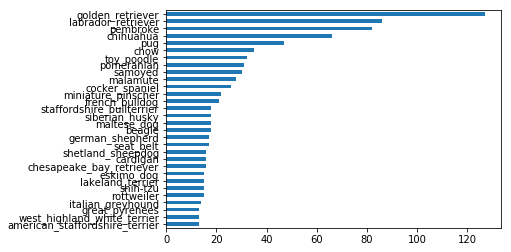

In [50]:
master_data['p1'].value_counts()[:30].sort_values().plot(kind = 'barh')

In [52]:
master_data['p1'].value_counts()

golden_retriever      127
labrador_retriever     86
pembroke               82
chihuahua              66
pug                    47
                     ... 
silky_terrier           1
wool                    1
hamster                 1
bookshop                1
hog                     1
Name: p1, Length: 194, dtype: int64

#### The highest counted type is the Golden Retriever with more than 120 counts. Also, we have several types sharing similar count values.

## Q3

In [51]:
#get the sum
sum_GR_rate = sum(master_data[(master_data['p1']== 'golden_retriever')]['rating_numerator'])
#get the len
len_GR_rate = len(master_data[(master_data['p1']== 'golden_retriever')]['rating_numerator'])
avg_GR_rate = sum_GR_rate/len_GR_rate

avg_GR_rate

13.362204724409448